# Analysis of the CaII line

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


In [2]:
import sys
print('sys.path:', sys.path)

sys.path: ['d:\\solar flares\\data\\2017-09-06', 'c:\\Users\\Gebruiker\\Anaconda3\\python311.zip', 'c:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib', 'c:\\Users\\Gebruiker\\Anaconda3', '', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\Pythonwin']


# functies uittesten met CaII

In [3]:
reload(un)

<module 'use_nessi' from 'd:\\solar flares\\data\\2017-09-06\\use_nessi.py'>

the following code block is not needed anymore. 

In [4]:
# def set_boundary_by_original_file(self, filename="", frame=0):
#     '''
#     Here there are 2 posibilities for the 'outside' of te frame. Either these are denoted by NaN and then
#     averaging is simpel by a numpy.mean() function wich only include the needed pixel

#     If however by correcting for the stokes factors the 'outside' of the frame is turned into a spectrum as well tCaIIn
#     we need to find the zero/outside spectrum in order that we can leave the pixels with this spectum out.
#     '''
#     if not hasattr(self, "original_cube"):
#         self.original_cube = f.getdata(filename)
#     if np.any(np.isnan(self.original_cube[frame, 0,:,:,:])):
#         R = np.isnan(self.original_cube[frame, 0,0,:,:])
#         R = np.where(R, 0, 1)
#         self.boundary = R
#         self.nr_real_pix = np.sum(R)
#         print(np.shape(R), np.sselfpe(self.datacube[frame, 0, 0,:,:]))
#         # self.plot_boundary()
#         plt.imshow(self.boundary[:,:])
#         plt.title('Boundary')
#         plt.show()
#         cp.plot(self.original_cube[frame,0,:,:,:].copy(),self._filt, show=True)
#     else:
#         print("this was not the original file. No NaN's detected")
# # %matplotlib widget
# CaII = un.SST_data(#'nb_8542_2017-09-06T09_04_20_09_04_20=0-200_mixed_stokes_corrected_im.fits',
#                    'nb_8542_2017-09-06T11_55_47_scans=3-215_stokes_corrected_im_new.fits',
#                    'spectfile8542_93.idlsave','times8542_93_2017_09_06_11_55_47.idlsave', name_of_line='CaII17')

# # CaII.datacube
# CaII.boundary
# # CaII.datacube[70,0,:,600,600]

# # %matplotlib widget
# for i in range(5):
#     CaII.second_boundary()

# print(np.sum(CaII.boundary))

We are now cutting a bit of the boundary such that it is in the intersection of all frames and that we do not take noise frome the sides in our calculations. 
However. We have to weight the area factor a little bit to account for this.

---------------------------------

Start from here onwards

 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


(1038, 1079) (1038, 1079)
Boundary
Blue=Outside, yellow=Inside


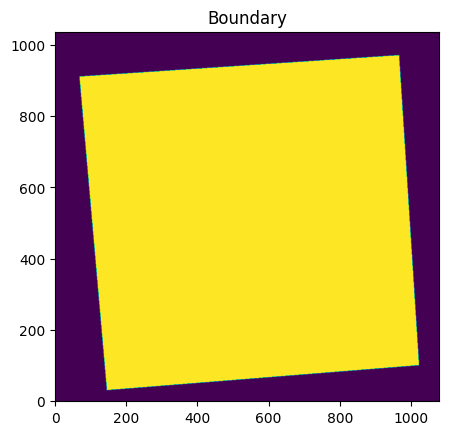

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')
[30, 60] [1.70895653e-08 1.99073806e-08]
[631, 646] [2.33172465e-08 1.96068617e-08]
[194, 268] [1.7007815e-08 1.9887316e-08]
[298, 323] [1.18704154e-08 1.36761467e-08]
[472, 204] [1.53954859e-08 1.85800599e-08]
[30, 60] [1.77462844e-08 2.11367137e-08]
[631, 646] [1.63276036e-08 1.83728823e-08]
[194, 268] [1.87398272e-08 2.19730493e-08]
[298, 323] [1.37608445e-08 1.88029691e-08]
[472, 204] [1.60014118e-08 1.89450619e-08]
[30, 60] [1.73635257e-08 2.01355732e-08]
[631, 646] [1.65598206e-08 1.81437240e-08]
[194, 268] [1.78025171e-08 2.02848739e-08]
[298, 323] [8.66208392e-09 9.81781716e-09]
[472, 204] [1.43120893e-08 1.66008937e-08]
[30, 60] [1.71880643e-08 2.01337755e-08]
[631, 646] [1.63602767e-08 2.73891362e-08]
[194, 268] [1.83631043e-08 2.08478821e-08]
[298, 323] [8.24692183e-09 9.06941650e-09]
[472, 204] [1.45487

In [5]:
reload(un)
# %matplotlib widget
# print(np.shape(CaII.datacube))
# vertices = (1038,1079),[(20, 104),(77, 1020), (960,964), (900,48)] # boundary of the first frame
vertices2 = [(30, 145),(100, 1020), (970,964), (910,68)] # more restricted boundary to fit all frames.
CaII = un.SST_data(#'nb_8542_2017-09-06T09_04_20_09_04_20=0-200_mixed_stokes_corrected_im.fits',
                   'nb_8542_2017-09-06T11_55_47_scans=3-215_stokes_corrected_im_new.fits',
                   'spectfile8542_93.idlsave','times8542_93_2017_09_06_11_55_47.idlsave',
                   name_of_line='CaII17', boundary_methode='By_user',boundary_arguments=vertices2)

for frame in range(0,213,70):
    pixels=[[30,60],[631,646],[194,268],[298,323],[472,204]]
    for i in pixels:
        print(i, CaII.datacube[frame,0,::10,i[1],i[0]])

# # CaII.datacube
# plt.imshow(CaII.boundary[:,:])
# print(np.shape(CaII.boundary), np.shape(CaII.datacube))

s = np.sum(CaII.boundary)
areafactor = s/847550 * 60**2 / (np.pi*950**2)

print(s, 'persentage of frame kept:', s/847550, 'areafactor:', areafactor) # to account for a bit of extra non excluded pixels


# CaII.datacube[70,0,:,600,600]

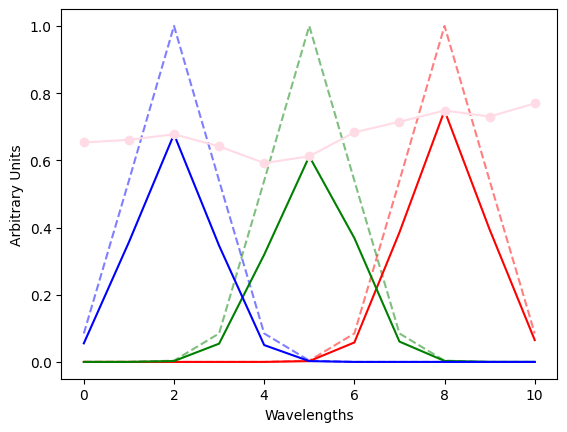

In [6]:
# %matplotlib inline
CaII.update_filters([[8,0.9], [5,0.9], [2,0.9]])
CaII.plot_filt(880,900)

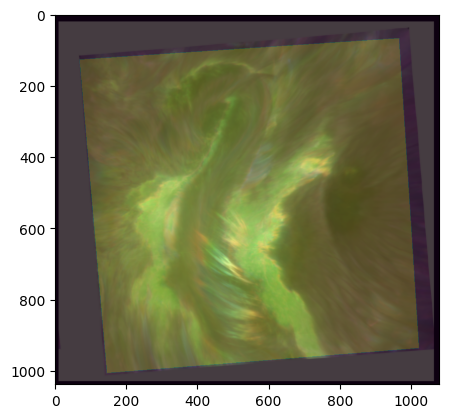

(1038, 1079, 3) (1038, 1079)


In [7]:
CaII.ccp_frame(70,Show=False)
plt.imshow(CaII.current_ccp[::-1,:])

plt.imshow(CaII.boundary[::-1,:], alpha=0.2)
plt.show()
print(np.shape(CaII.current_ccp[::-1,:]),np.shape(CaII.boundary[::-1,:]))

COCOPLOT at  t=11:55:57 UT (frame number 0 )


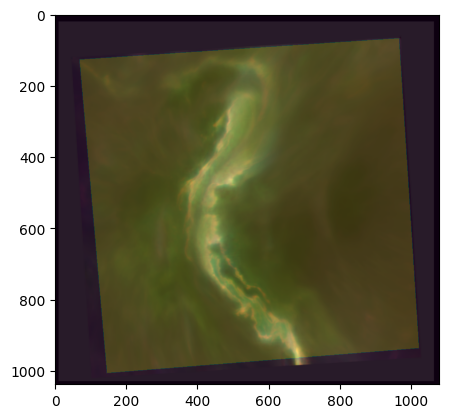

COCOPLOT at  t=12:05:56 UT (frame number 40 )


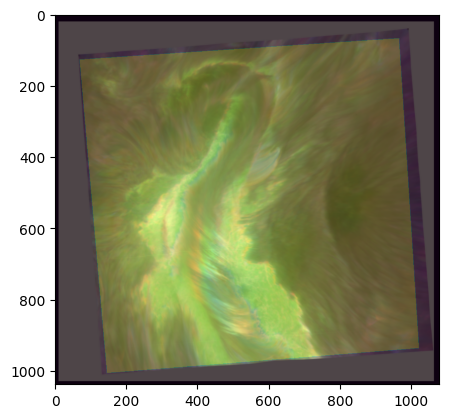

COCOPLOT at  t=12:15:55 UT (frame number 80 )


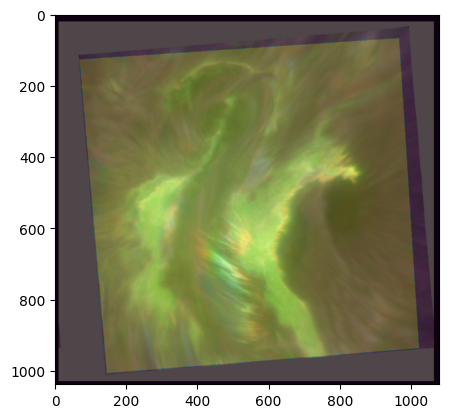

COCOPLOT at  t=12:25:53 UT (frame number 120 )


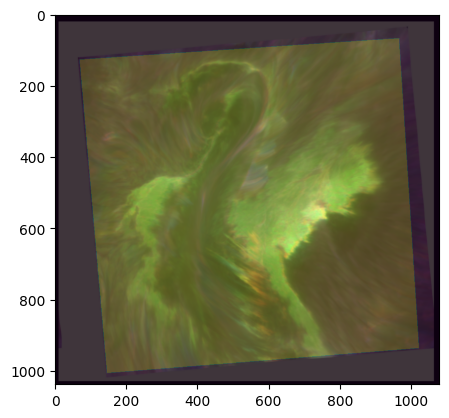

COCOPLOT at  t=12:35:52 UT (frame number 160 )


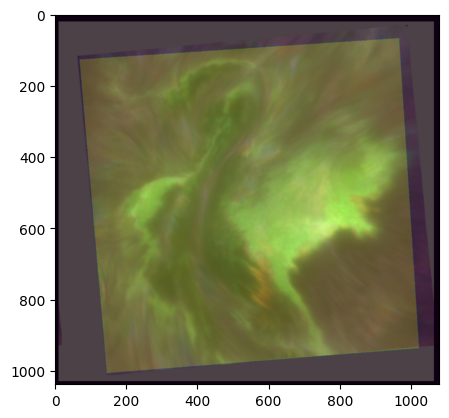

COCOPLOT at  t=12:45:51 UT (frame number 200 )


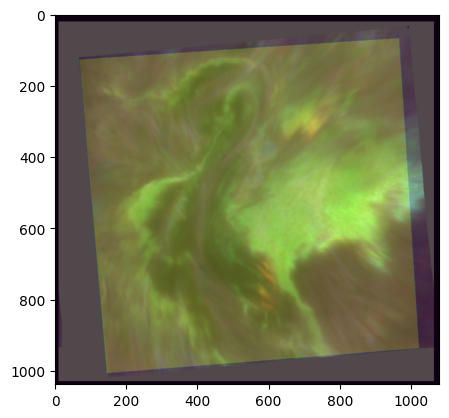

In [8]:
# Many COCOPLOTS
r = CaII._number_of_frames
for i in range(0,r,40):
    tstr = CaII.time_of_frame(i)
    print("COCOPLOT at ", tstr, "(frame number", i,")")
    CaII.ccp_frame(i,Show=False)
    plt.imshow(CaII.current_ccp[::-1,:])

    plt.imshow(CaII.boundary[::-1,:], alpha=0.2)
    plt.show()


COCOPLOT at  t=12:13:25 UT (frame number 70 )


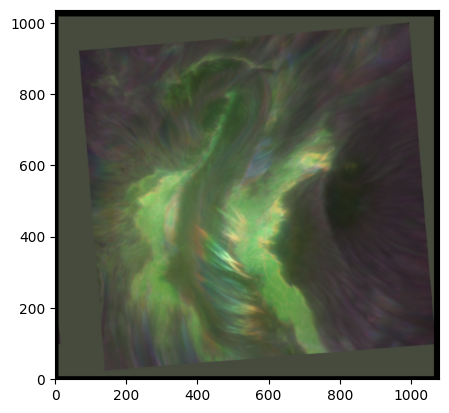

In [9]:
CaII.ccp_frame(70)
pixels=[[30,60],[631,646],[194,268],[298,323],[472,204]]
# CaII.current_ccp[0:30:5,0:60:5,:]

In [10]:
# print(pixels)
# x=[]
# frame = 70
# for frame in range(0,213,40):
#     print('frame:',frame)
#     for i in pixels:
#         x.append(CaII.datacube[frame,0,10,i[1],i[0]] - CaII.datacube[frame,0,0,i[1],i[0]])
#         print(i, x[-1])
# CaII.interesting_pixels(frame, pixels, rand=False, numb=30)
# mx = np.mean(x)
# correction = - mx * (CaII._wavel - CaII._wavel[0])
# print(CaII._wavel, correction)

# frame = 70

# print(frame)
# colors = CaII.ccp_frame(frame,Show=False)

# fig, ax = plt.subplots(1)
# ax.set_title("spectral lines of some pixels: "+ CaII.time_of_frame(frame) )
# for p in range(len(pixels)):
#     ax.plot(CaII._wavel, CaII.datacube[frame,0, :, pixels[p][1], pixels[p][0]] + correction,
#             label="pixel x="+str(pixels[p][0])+" y="+str(pixels[p][1]))
# ax.set_xlabel(r"wavelength [$\rm\AA$]")
# ax.set_ylabel("intensity [units???]")
# ax.legend(fontsize=6)
# plt.show()

In [11]:
print('1',end='\rt')
print('10 ',end='')
print('\r\r\r11 ',end='')
j=12
s = ''
for i in range(len(str(j))+1):
    s += '\r'
print(s, end=str(j))

12  

In [12]:
CaII.calculate__FOV_spect_over_time()

# try :
#     FOV_spectrum = np.load('FOV_spectrum_CaII.npy')
# except:
#     # time_av_spectrum = np.array([Ha.frame_integrated_spect(frame)/Ha.scalar for frame in range(213)])
#     FOV_spectrum=[]
#     for frame in range(np.shape(self.datacube)[0]):
#         s=''
#         for i in range(len(str(frame))+1):
#             s += '\r'
#         print(s, end=str(frame))
#         FOV_spectrum.append(self.frame_integrated_spect(frame)/self.scalar)

#     FOV_spectrum = np.array(FOV_spectrum)
#     np.save('FOV_spectrum_CaII.npy', FOV_spectrum)
# np.shape(FOV_spectrum), self.scalar

Make sure the following correction is added only once! However adding it a second time should not differ it.

In [13]:
# def add_correction(self, FOV_spectrum, theoretical_difference):
#     if hasattr(self, 'correction'):
#         print('the correction has already been done ')
#         return FOV_spectrum, self.correction

#     mean_difference_observation = np.mean(FOV_spectrum[:,-1]-FOV_spectrum[:,0])
#     print(mean_difference_observation, theoretical_difference)

#     correction = -(mean_difference_observation - theoretical_difference) * (self._wavel - self._wavel[0])

#     FOV_spectrum = FOV_spectrum + correction
#     self.correction = correction
#     return FOV_spectrum, correction

FOV_spectrum, correction = CaII.add_correction(theoretical_difference=0.03497400310369425)



In [14]:
print(correction)

[-0.         -0.03381729 -0.06763458 -0.08454323 -0.10145187 -0.11836052
 -0.13526916 -0.15217781 -0.16908645 -0.20290375 -0.23672104]


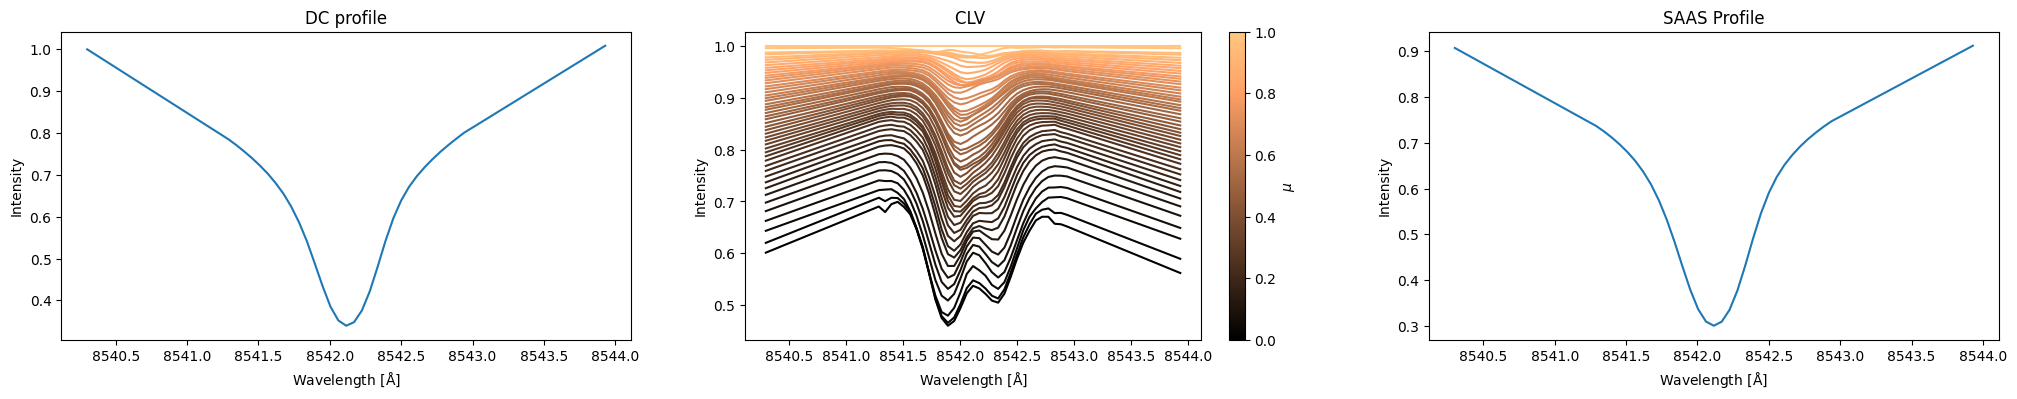

crisp::read_reflectivity: (RL,RH)[8542.114877954633] = (0.851550166761555, 0.9299031666516842)


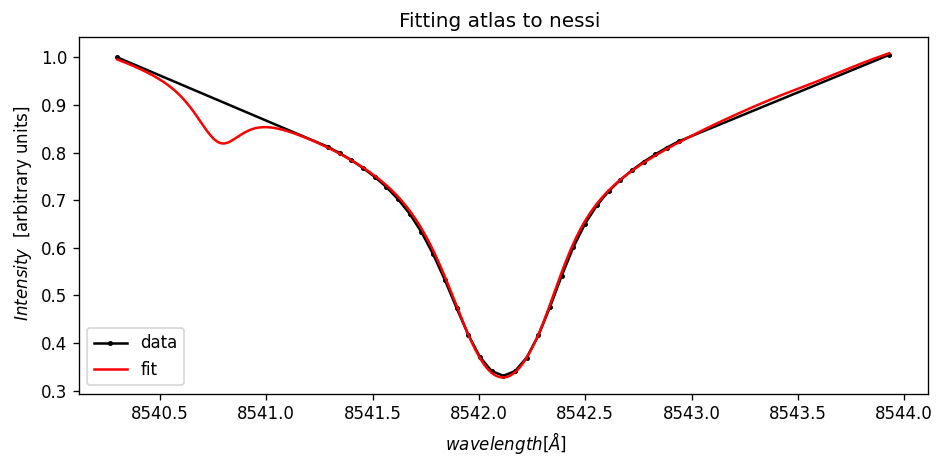

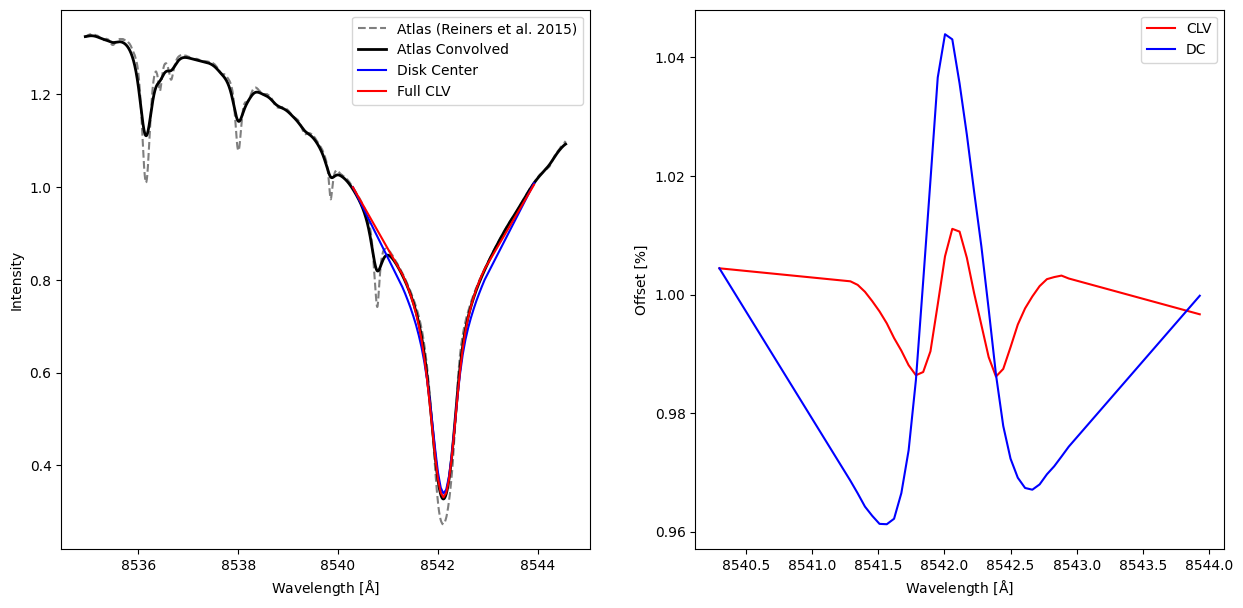

In [15]:
theor_CaII = un.linestudier('8542_clv.fits', nr=101)
theor_CaII.saas_profile_atlas_check(show_all=False, initial_values_fit=np.array([-2.364e+00,  1.412e-02,  1.380e+00]))

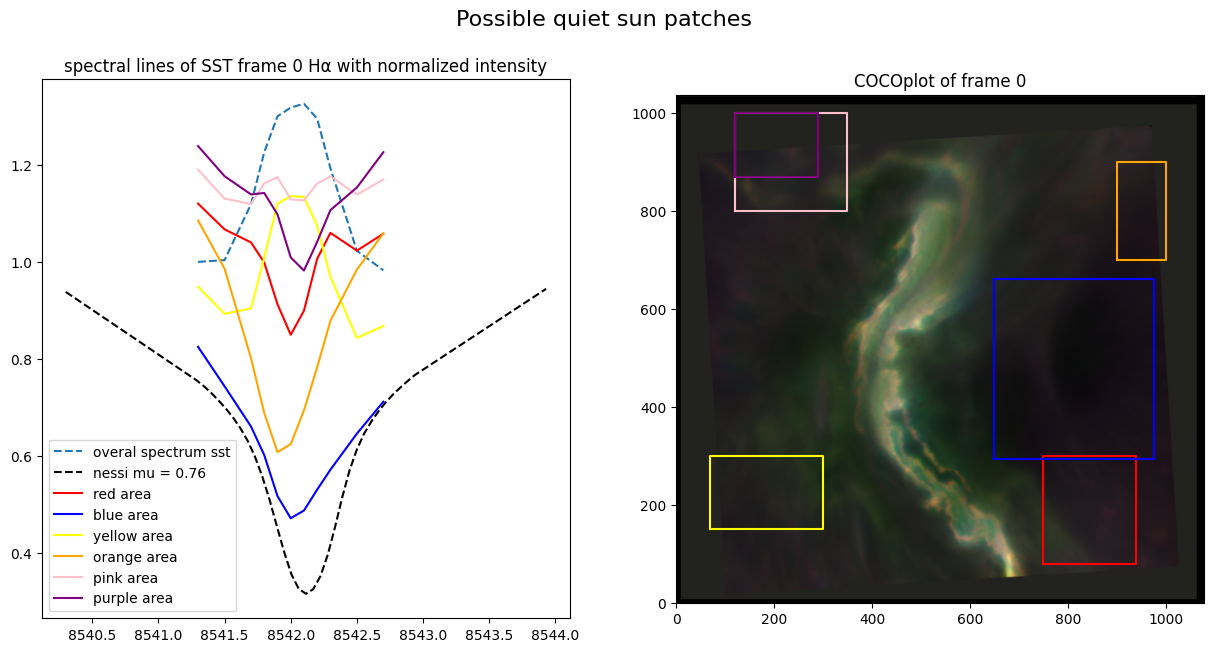

In [16]:
# %matplotlib widget
# %matplotlib inline
frame = 0

X = [[(750,940), (80,300)], [(650,975), (294,662)],[(70,300), (150,300)], [(900, 1000), (700, 900)], [(120,350), (800,1000)] 
     , [(120,290), (870,1000)]]
# X = [[(750,940), (230,300)], [(650,975), (294,662)],[(270,300), (250,300)], [(800, 900), (700, 900)], [(220,350), (700,800)] , [(220,290), (700,800)],]
#X=[[(600,602),(600,602)]]
CaII.possible_quiet_sun_patches(frame, theor_line = theor_CaII, X=X)
# for i in X:
#             xlim=i[0]
#             ylim=i[1]
#             print(CaII.area_av_spect(frame, xlim=xlim, ylim=ylim)/CaII.scalar)
#             print(CaII.datacube[frame, 0, :, ylim[0]:ylim[1], xlim[0]:xlim[1]])


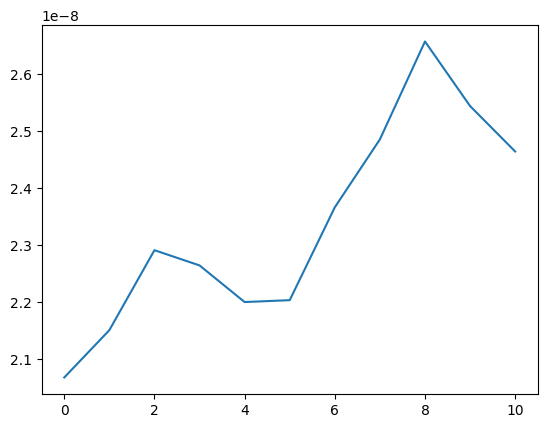

In [17]:
x=880
y=900
plt.plot(CaII.datacube[frame, 0, :, y,x])
plt.show()

0 (900, 1000) (700, 900)


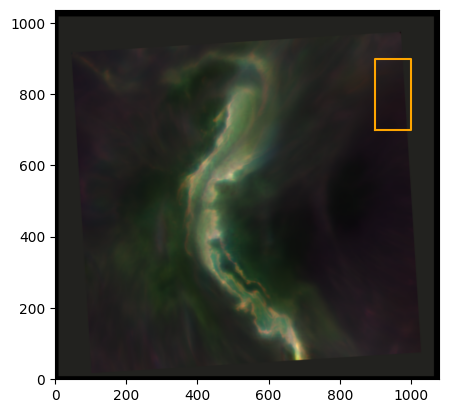

In [18]:
xlim = (900, 1000)
ylim = (700, 900)
print(frame, xlim, ylim)
CaII.set_quiet_sun(frame, xlim, ylim, show=False, color='orange')

## Finding $\mu$

(213, 4, 11, 1038, 1079)
The frame is centered at (524.6951755526969, -235.1869288002494)


 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


[500.87502555269697, 548.5153255526969, -267.62932880024937, -202.7445288002494]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7997209667453697 for timeframe 0
The frame is centered at (529.4665422492486, -232.5215139851784)
[505.64639224924866, 553.2866922492486, -264.96391398517835, -200.0791139851784]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7971482301738789 for timeframe 200
We take average mu to be  0.7984345984596244
Mu also set to the theoretic nessi line.


(0.7984345984596244, array([10], dtype=int64))

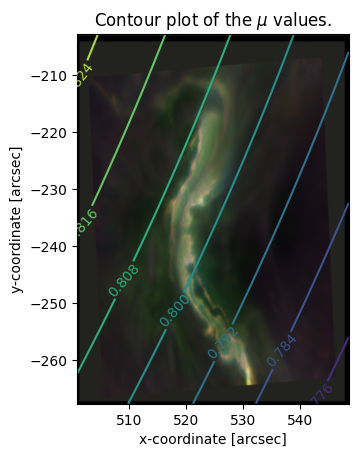

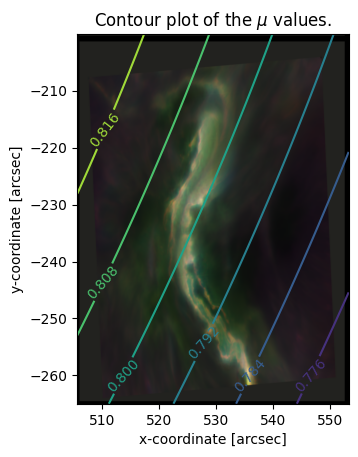

In [19]:
print(np.shape(CaII.datacube))
mu = CaII.set_mu(theor_line=theor_CaII, number_of_last_frame=200, 
                    alternative_filename='fits/nb_3950_2017-09-06T11_55_49_11_55_49=6-399_mixed_corrected_im.fits')
x = np.abs(theor_CaII.sst_mu-mu)
index_mu = np.where(x == np.min(x))[0]
mu, index_mu

Best fitting mu is 0.8


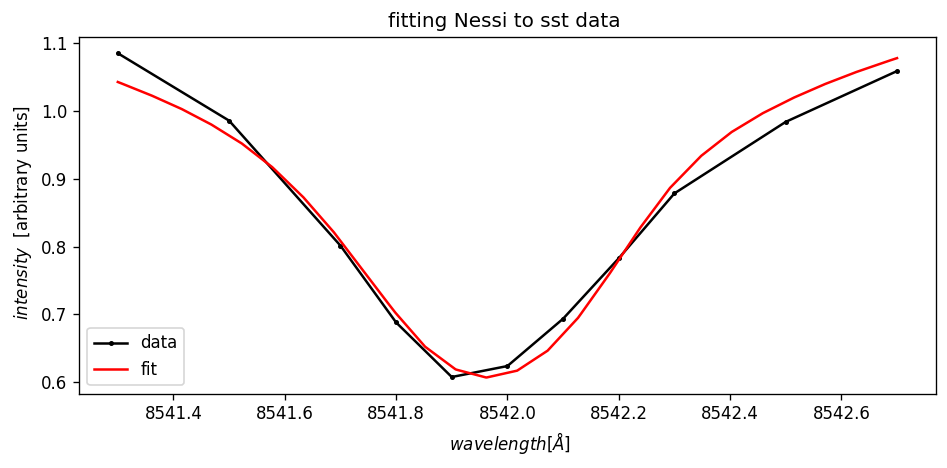

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 69.53990485957394
        x: [-1.527e-01  2.649e-01  1.082e+00]
      nit: 12
      jac: [ 5.722e-06 -9.537e-07 -4.768e-06]
 hess_inv: [[ 1.151e-05 -1.590e-06  3.729e-06]
            [-1.590e-06  8.488e-05 -1.490e-04]
            [ 3.729e-06 -1.490e-04  2.826e-04]]
     nfev: 84
     njev: 21
de p-waarde is  0.36889760801964644 
Chi^2 reduced= 8.692488107446742 
aantal vrijheidgraden= 8 
chi^2= 69.53990485957394
we behouden de fit tot op een betrouwbaarheidsniveau van  0.36889760801964644 
Oftewel verwerp als p-waarde <lpha-niveau 


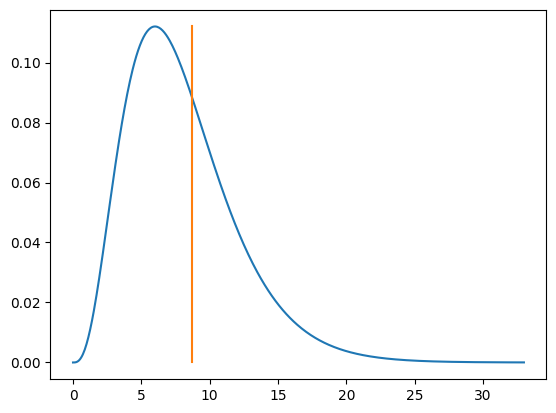

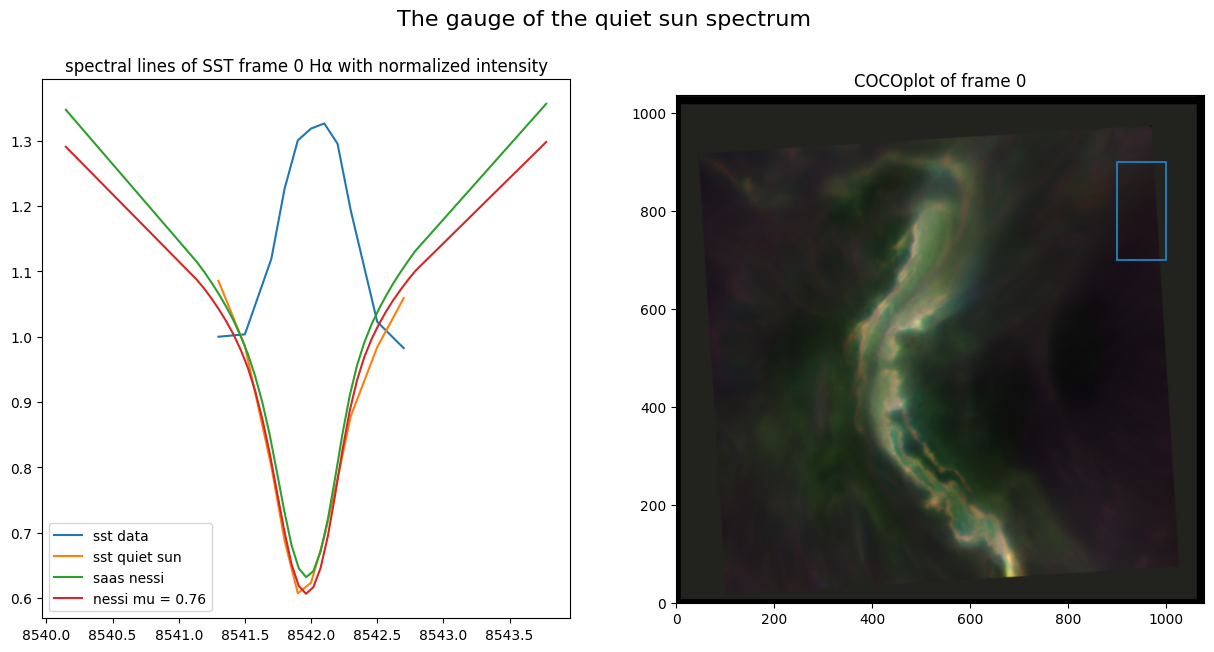

In [20]:
mini, f_nessi_theta, f_nessi_clv_theta = CaII.fit_nessi_to_quiet_sun( theor_line = theor_CaII, mu_data=0.7984345984596244,
                                                                     initial_values=np.array([-2.349e-01 , 5.072e-01,  8.865e-01]))

In [21]:
# calculation the theoretical difference
f_nessi_clv_theta(CaII._wavel[-1]) - f_nessi_clv_theta(CaII._wavel[0])

0.03520570533124778

if integrated in the full disk spectrum the maximal deviation is  0.20913411942067306 %.


Text(0.5, 1.0, 'COCOplot')

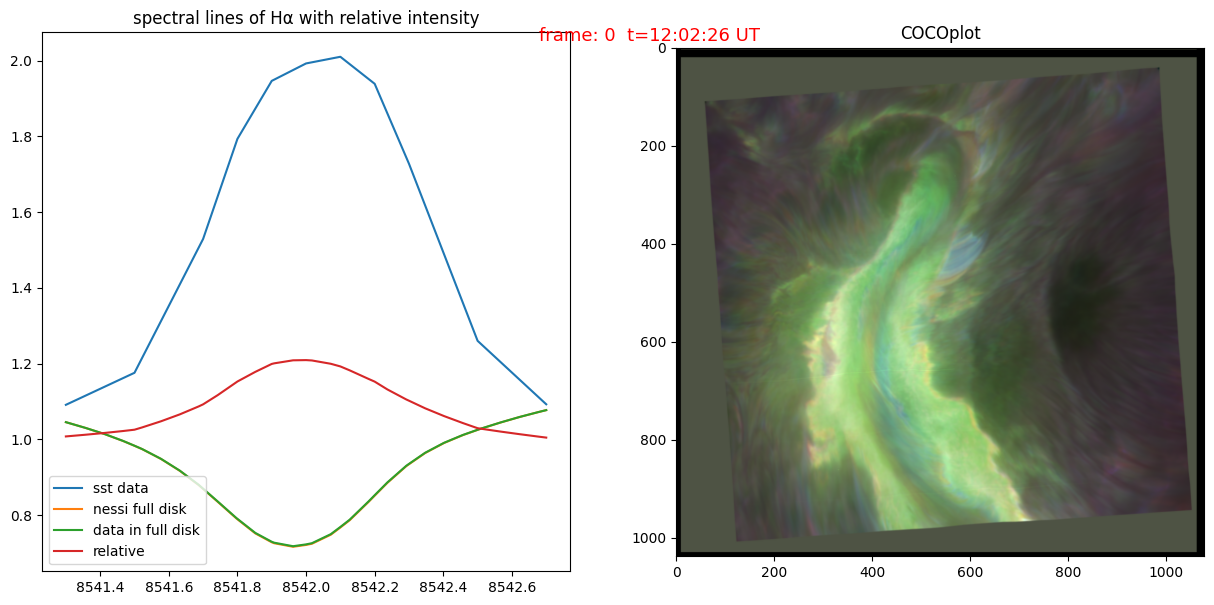

In [22]:
theor_line = theor_CaII
self = CaII
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
frame = 26

CaII.frame_integrated_spect(frame)
CaII.ccp_frame(frame,Show=False)



wav = un.merge_wavelengths(self._wavel, theor_CaII.sst_wav+ self.theta_nessi_to_quiet_sun[0])


f_nessi_clv = lambda theta: interp1d(theor_CaII.sst_wav + theta[0], theta[2] * theor_CaII.sst_dc*theor_CaII.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_CaII.sst_wav + theta[0], theta[2] * theor_CaII.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(self._wavel, self.av_spect/self.scalar, kind='linear', fill_value="extrapolate")



# line_sst, = ax[0, 0].plot(self._wavel, self.av_spect/self.scalar, '--', label='sst data')
# ax[0, 0].plot(theor_CaII.sst_wav + theta[0], theta[2] * theor_CaII.sst_dc*theor_CaII.sst_clv[12] + theta[1], label='nessi mu = 0.76')
# ax[0, 0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')

theta = [-1.561e-01,  4.360e-01,  8.237e-01]

a=self.current_ccp
im = ax[1].imshow(Image.fromarray(a[::-1,:]), interpolation='none', aspect='auto', vmin=0, vmax=1)

# Ha.ccp_frame(frame,Show=False)
_tstr=(f"Ca t={CaII._time[frame][0:-7]} UT")

_tstr=_tstr[2:5]+_tstr[7:15]+_tstr[16:]
scaler = 2.7306518951052202e-08
ax[1].text(-280,-15,"frame: 0 "+_tstr, fontsize=13, color='red')

ax[0].set_title("spectral lines of H\u03B1 with relative intensity")

ax[0].plot(wav, f_sst(wav), label='sst data')
ax[0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')



# f_sst_full = lambda theta : f_nessi(theta) + areafactor * (f_sst - f_nessi_clv(theta))
# f_relative = lambda theta : f_sst_full(theta) / f_nessi(theta)
sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))
relative = sst_full / f_nessi(theta)(wav)
print("if integrated in the full disk spectrum the maximal deviation is ",  (np.max(relative)-1)*100, '%.')

ax[0].plot(wav, sst_full , label='data in full disk')
ax[0].plot(wav, ((f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))) / f_nessi(theta)(wav)-1)*100+1, label='relative')

ax[0].legend(loc='lower left')
# ax[0].set_xlim([6561, 6565])
# ax[0].set_ylim([0.2, 1.5])
ax[1].imshow(Image.fromarray(self.current_ccp[::-1,:]))
ax[1].set_title("COCOplot")

The full FOV integrated spectrum over time:

In [23]:
self = CaII
np.shape(self.datacube)

(213, 4, 11, 1038, 1079)

# Figure 4 In HARPS ALEX
![Schermafbeelding 2023-11-26 093811.png](<attachment:Schermafbeelding 2023-11-26 093811.png>)

Now we do it for the FOV spectum with as normalisation the quiet sun
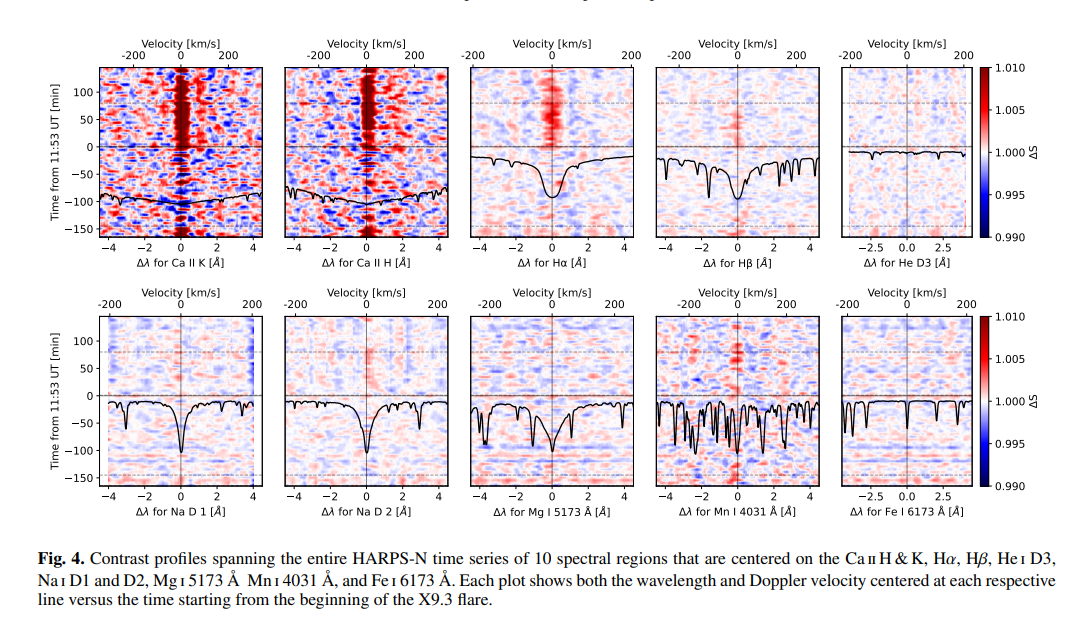

8541.944099083514


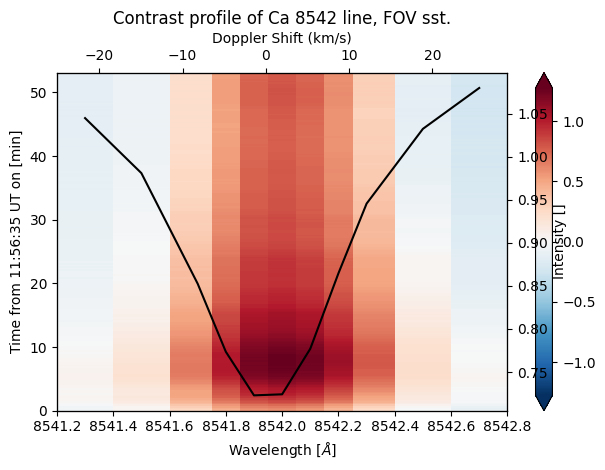

In [24]:
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

self = CaII

theta = [-1.708e-01,  4.528e-01,  8.349e-01]# [ 1.750e-01,  1.487e-01,  9.732e-01]
theor_line = theor_CaII

f_nessi_clv = interp1d(theor_CaII.sst_wav + theta[0], theta[2] * theor_CaII.sst_dc*theor_CaII.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")

QS = f_nessi_clv(self._wavel)
FOV_spectrum = self.FOV_spectrum

Z = FOV_spectrum - QS
x = self._wavel

def hulp_time(string):
    return float(string[:2])*60 + float(string[3:5]) + float(string[6:8])/60

def time_to_minutes(_time):
    return np.array([ hulp_time(t) for i,t in enumerate(_time) ])

TIME = time_to_minutes(self._time)[3:216] - 716.58333333
y = TIME
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of Ca 8542 line, FOV sst.')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Delta lambda / lambda = v / c

c = 3e5 #m/s
linecenter = 8541.944099083514 # x[np.where(QS == np.min(QS))[0][0]]
print(linecenter)
velocity = c * (x - linecenter) / linecenter

ax3 = ax2.twiny()
ax3.plot(velocity,QS, color=color, alpha=0)  # Use the same y-data
ax3.set_xlabel('Doppler Shift (km/s)')
ax3.tick_params(axis='x')

fig.tight_layout()
plt.show()

(213, 11) [1.         1.00363727 1.11921248 1.22649768 1.30041097 1.31850762
 1.32628811 1.29531151 1.19316614 1.02283562 0.9825954 ] [8541.3 8541.5 8541.7 8541.8 8541.9 8542.  8542.1 8542.2 8542.3 8542.5
 8542.7]


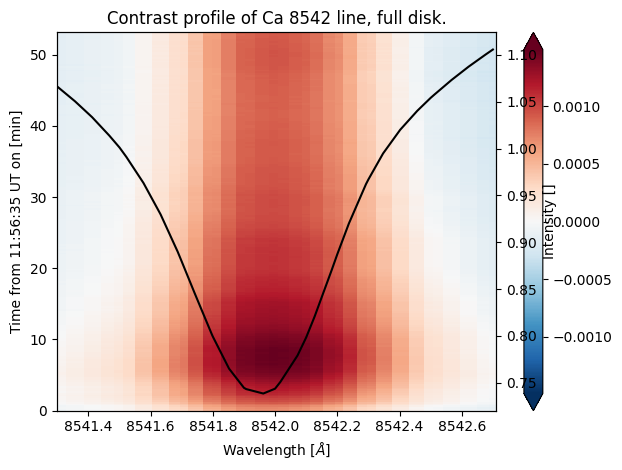

In [25]:

wav = un.merge_wavelengths(self._wavel, theor_CaII.sst_wav+ self.theta_nessi_to_quiet_sun[0])

f_nessi_clv = lambda theta: interp1d(theor_CaII.sst_wav + theta[0], theta[2] * theor_CaII.sst_dc*theor_CaII.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_CaII.sst_wav + theta[0], theta[2] * theor_CaII.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")

print(np.shape(FOV_spectrum), FOV_spectrum[0], self._wavel)
# print([(interp1d(self._wavel, FOV_spectrum[0], kind='linear', fill_value="extrapolate")(wav)) for i in range(np.shape(FOV_spectrum)[0])])
# print(f_sst(wav))




QS_clv = f_nessi_clv(theta)(wav)
# print([f_nessi(theta)(wav) + areafactor*(interp1d(self._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_clv)
#                         for i in range(np.shape(FOV_spectrum)[0])])

Z_full_disk = np.array([areafactor*(interp1d(self._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_clv)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
y = TIME
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of Ca 8542 line, full disk.')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [26]:
print(wav[np.where(QS_clv == np.min(QS_clv))[0][0]])

8541.962132040118


In [27]:
filename = un.get_file_path_line_data(self.name_of_line)
np.save(filename, np.array([x,f_nessi(theta)(wav)]))

# Equivalent width

The frame integrated spectrum:
$$f(t,\lambda,A) = \int_A I(t,\lambda,\vec{x})d\vec{x}$$

weight against a continuum wavelength
$$F(t,\lambda,A) = \frac{f(t,\lambda,A)}{f(t,\lambda_\text{cont},A)} \times f(t_0,\lambda_\text{cont},A)$$

Target Region wieghted against a quiet region to find relative intensity
$$F_{TR}(t, \lambda) = \frac{F(t,\lambda,A = TR)}{F(t,\lambda,A = QR)} \times F(t_0,\lambda,A=QR)$$
This we do both with the scalar multiplication to find relative intensities

The difference in spectrum in time (we do spectrum - quiet sun)
$$\Delta F=  F_{TR}(t,\lambda) - F_{TR}(t_0,\lambda)$$

weighing it again against a reference intensity. (We incorporate this is the scalar weight)
$$\Delta S(t,\lambda) = \Delta F_{TR}(t,\lambda)/F(t_0,\lambda_\text{cont},A=\text{ full disk})$$

The equivalent width is defind as the integral over the resulting normalized pre-event-subtracted H$\alpha$ spectrum
$\Delta S(t, \lambda)$ represents the ratio of the spectral changes coming from
active events to the solar irradiance (full-disk continuum). 
$$ \Delta EW_{H\alpha \pm \Delta \lambda } = \int_{H\alpha - \Delta \lambda}^{H\alpha + \Delta \lambda} \Delta S(t,\lambda ) d\lambda $$ 


To obtain something analogous (or even maybe equivalent although only a function of the line center.) We could integrate over the difference of NESSI+sst - NESSI.








In [28]:
import scipy

def differenced_equivalent_width(self, f_nessi_theta, f_nessi_clv_theta, wav, Dlambda):

    line_center = wav[np.where(f_nessi_theta(wav) == np.min(f_nessi_theta(wav)))[0][0]]
    interval = [line_center-Dlambda, line_center+Dlambda]

    DEW = []

    for frame in range(self._number_of_frames):
        DS = areafactor * (interp1d(self._wavel, self.FOV_spectrum[frame])(wav) - f_nessi_clv_theta(wav))

        x, restx = un.restrict_intervalx2(interval, wav)

        DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))

    return DEW


In [29]:
np.shape(TIME)

(213,)

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_7004\3057184113.py:15: DeprecationWarning: The 'even' keyword is deprecated as of SciPy 1.11.0 and will be removed in SciPy 1.13.0
  DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))


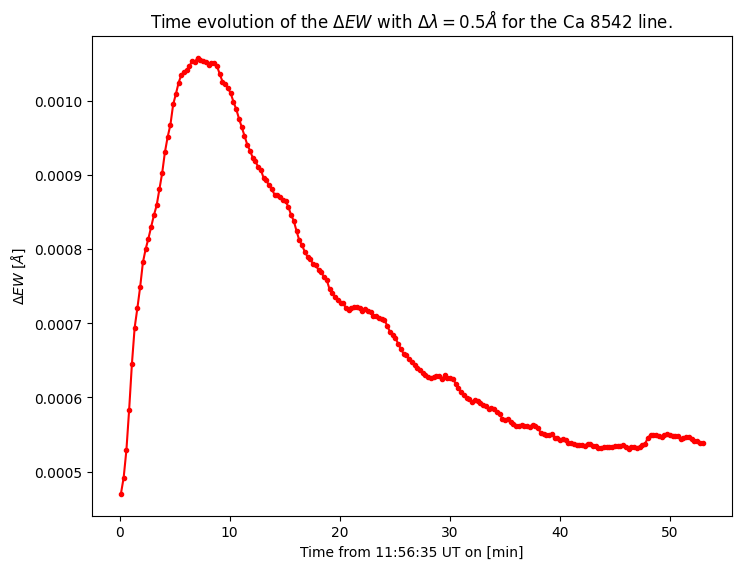

In [30]:
DEW = differenced_equivalent_width(self = CaII, f_nessi_theta = f_nessi_theta, f_nessi_clv_theta=f_nessi_clv_theta, wav=wav, Dlambda= 0.5)

fig = plt.figure()
ax1 = fig.add_axes((0,0,1,1))
ax1.plot(TIME, DEW, '-o', color='r', label=r'$\Delta EW$', markersize=3)
ax1.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$ for the Ca 8542 line. ')
ax1.set_xlabel('Time from 11:56:35 UT on [min]')
ax1.set_ylabel(r'$\Delta EW$ $[\AA]$')
# ax1.legend()
plt.show()

# Best possible interval
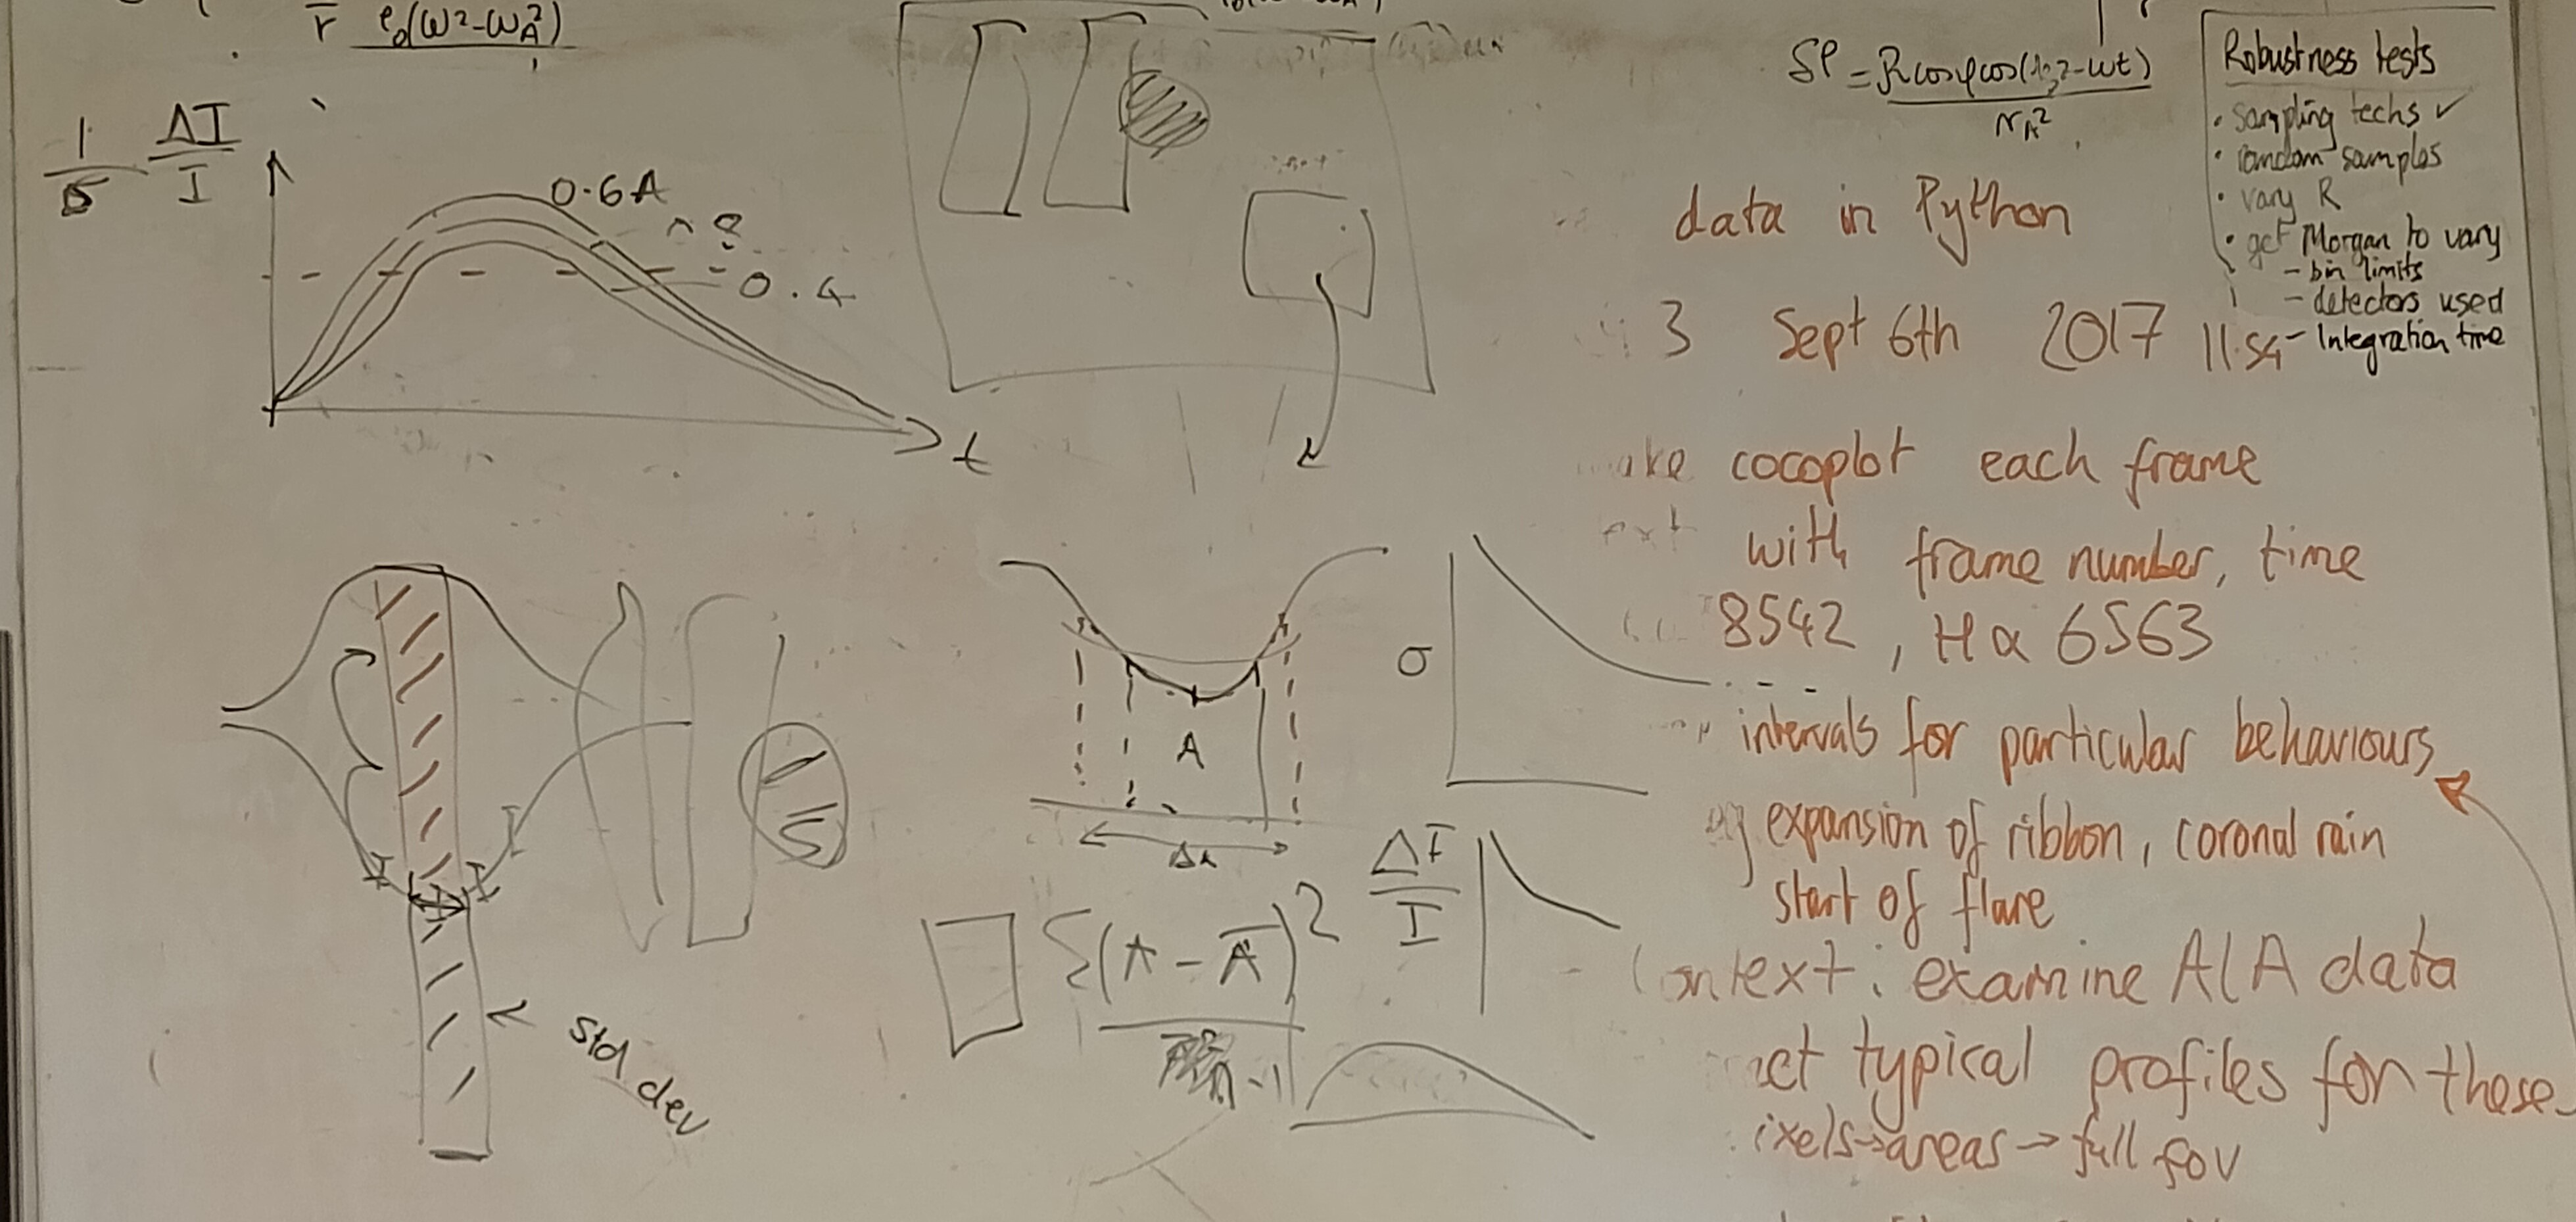

The goal is to find the best signal to noise ratio of detecting a flare by giving an optimal interval. Here we look at 
$$\frac{1}{\sigma}\frac{\Delta I}{I} $$
where $\sigma$ is the standard deviation of the spectrum in the interval PER UNIT AREA!(with following two options):

- Looking for an area $A$ under the interval with with $\Delta x$ for each pixel en then taking $\sum \frac{1}{n-1} (A - \bar{A})^2$
- looking at the standard deviation of the all of the wavelength values then averaging over those used in the interval. 

Remark: this has to be done per unit area or per pixel. 

Here we will display the standard devation for the two regimes for the Halpha line

d:\solar flares\data\2017-09-06\use_nessi.py:1432: RuntimeWarning: divide by zero encountered in scalar divide
  return np.nanstd(np.sum(self.datacube[frame,0,(wav<= interval[1]) &
d:\solar flares\data\2017-09-06\use_nessi.py:1423: RuntimeWarning: invalid value encountered in scalar divide
  std = integral / l_interv / appr_num**0.5


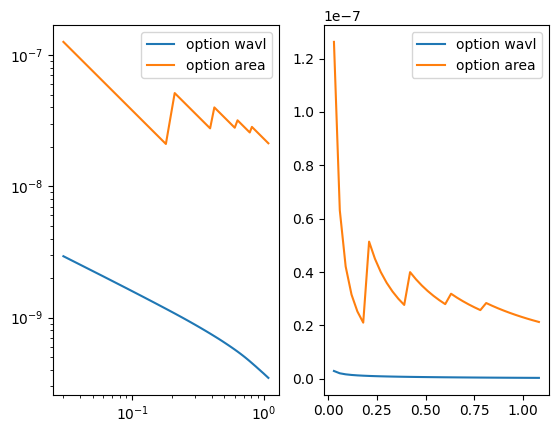

STD_Area = array([2.52463861e-07, 1.26231931e-07, 6.31159653e-08, 4.20773102e-08,
       3.15579826e-08, 2.52463861e-08, 2.10386551e-08, 5.13947449e-08,
       4.49704018e-08, 3.99736905e-08, 3.59763214e-08, 3.27057467e-08,
       2.99802678e-08, 2.76740934e-08, 3.99638256e-08, 3.72995706e-08,
       3.49683474e-08, 3.29113858e-08, 3.10829755e-08, 2.94470294e-08,
       2.79746779e-08, 3.18693309e-08, 3.04207249e-08, 2.90980847e-08,
       2.78856645e-08, 2.67702379e-08, 2.57406134e-08, 2.83899327e-08,
       2.73760065e-08, 2.64320063e-08, 2.55509394e-08, 2.47267156e-08,
       2.39540057e-08, 2.32281268e-08, 2.25449466e-08, 2.19008052e-08,
       2.12924495e-08]), STD_Wavl = array([0.00000000e+00, 2.93307770e-09, 2.06334654e-09, 1.67601759e-09,
       1.44394129e-09, 1.28476306e-09, 1.16667258e-09, 1.07437305e-09,
       9.98940197e-10, 9.35508225e-10, 8.81149847e-10, 8.33807005e-10,
       7.92067078e-10, 7.54854391e-10, 7.21307728e-10, 6.91046802e-10,
       6.63003588e-10, 6.36898

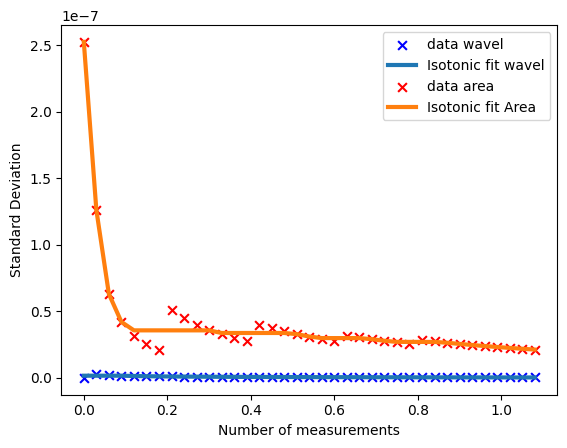

d:\solar flares\data\2017-09-06\use_nessi.py:1497: RuntimeWarning: invalid value encountered in scalar divide
  return Delta_i / I


The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.12\AA$.
at an intesity of 18703.739109377417. For a standard deviation of 3.5736883195592676e-08.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=1.05\AA$.
at an intesity of 932584.4645042211. For a standard deviation of 3.5601394312713777e-10.



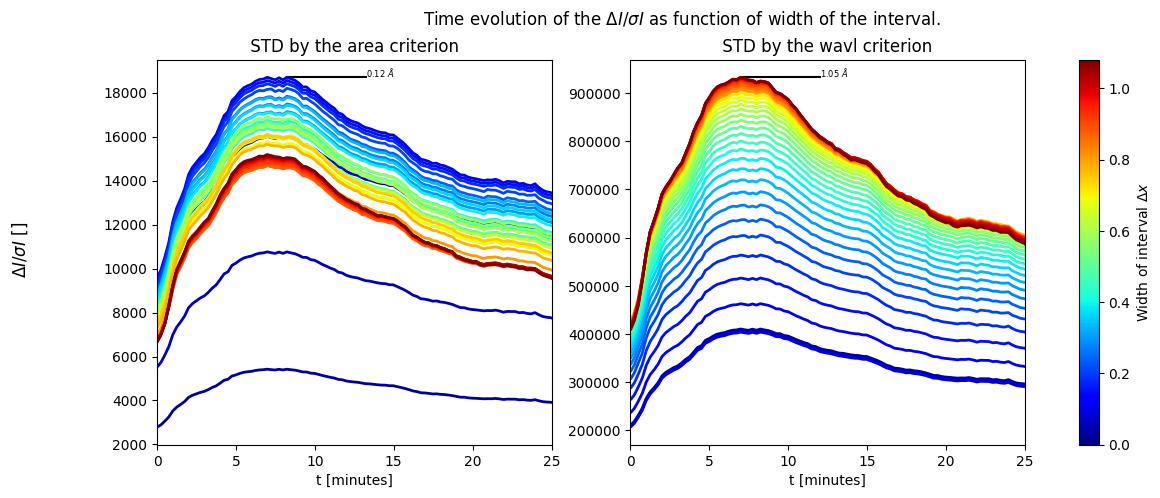

d:\solar flares\data\2017-09-06\use_nessi.py:1641: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


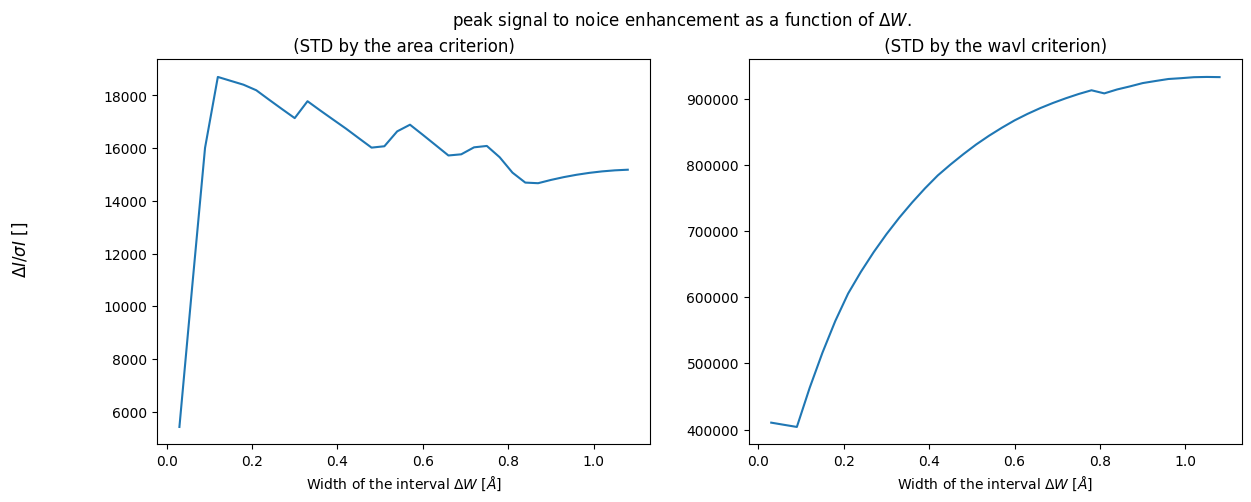

Directory 'line_data/optimal_width' already exists.


(array([[          nan,           nan,           nan, ...,           nan,
                   nan,           nan],
        [2783.81140949, 2891.97457965, 3061.97585534, ..., 3446.8062367 ,
         3422.22462411, 3431.79424162],
        [5514.9440702 , 5731.24659102, 6070.43211262, ..., 6823.22281861,
         6775.89295466, 6793.39430228],
        ...,
        [6702.34135667, 7025.38823728, 7532.41621712, ..., 7678.42988623,
         7646.47144904, 7644.11395518],
        [6677.56371288, 7001.2563571 , 7511.53380187, ..., 7611.63158942,
         7581.30932872, 7579.21773271],
        [6644.66013721, 6968.64342545, 7481.81975338, ..., 7533.75450374,
         7505.2320966 , 7503.39161597]]),
 array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [210661.04269665, 218846.13962162, 231710.748867  , ...,
         260832.25082019, 258972.07159904, 259696.23904688],
        [208667.8472924 , 216852.04296296, 229685

In [34]:
reload(un)
un.analyse_optimal_interval(sst_data=CaII, Deltas=np.arange(0,1.1, 0.03))


# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [2]:
un.save_for_further_analysis(CaII, theor_CaII)
import numpy as np
import use_nessi as un

filename = un.get_file_path_line_data("TIME_CaII17")
TIME = np.load(filename)
print(np.shape(TIME))
if np.shape(TIME)[0] > 213:
    print("We change it")
    TIME = TIME[3:216]
    np.save(filename, TIME)

(226,)
We change it
